# Matrix configuration of interest

Change these parameter values to whatever matrix you're interested in

In [28]:
candidates = 10
voters = 20

# Load in data

In [29]:
# Load data
import pickle

import pandas as pd
df : pd.DataFrame

with open("testOutputBTVA.pkl", "rb") as file:
    df = pickle.load(file)

In [30]:
df.head()

,input,voting_scheme,happiness_measure,happiness_values,risk_measure,risk_values
0,"[[B, D, D, A, B], [A, C, A, B, D], [E, B, E, D...",Anti-plurality voting,NDCG,"[0.8174935137996165, 0.3424985031845269, 0.397...",Flip Reward,0.268915
1,"[[C, E, D, D, A], [A, A, B, B, C], [B, C, E, E...",Anti-plurality voting,NDCG,"[0.6074915180456525, 0.6074915180456525, 0.369...",Flip Reward,0.526001
2,"[[E, B, B, D, B], [C, E, A, C, D], [A, A, E, E...",Anti-plurality voting,NDCG,"[0.8400079830158563, 0.8174935137996165, 0.789...",Flip Reward,0.650047
3,"[[C, D, A, E, C, A, B, C, E, B, B, D, C, A, A,...",Anti-plurality voting,NDCG,"[0.894999002123018, 0.5250049893849101, 0.1324...",Flip Reward,0.475319
4,"[[C, D, E, B, E, E, C, D, D, A, C, B, B, B, C,...",Anti-plurality voting,NDCG,"[0.36999401273810767, 0.8174935137996165, 0.81...",Flip Reward,0.475319


In [31]:
# Change happiness_measure value 'Bubble sort distance / Kendall Tau Distance' to 'Bubble sort'
df["happiness_measure"] = df["happiness_measure"].replace("Bubble sort distance / Kendall Tau Distance", "Bubble sort")

# TODO: Probably change get hapiness to binary later ...


# Preload df

In [32]:
# Drop rows on column input, with shapes that are not (candidates, voters)
df = df[df.input.apply(lambda x: x.shape == (candidates, voters))]

# Hapiness

In [33]:
# Drop columns
df_happiness = df.drop(columns=["risk_measure", "risk_values"])

# Convert the happiness values list to an average value
df_happiness["happiness_values_avg"] = df_happiness["happiness_values"].apply(lambda x: sum(x) / len(x))

# Drop duplicates based on the matrix column
df_happiness["input_str"] = df_happiness["input"].apply(lambda x: str(x))
df_happiness = df_happiness.drop_duplicates(subset=["input_str", "voting_scheme", "happiness_measure"])
df_happiness = df_happiness.drop(columns=["input_str"])

In [34]:
df_happiness.head()

,input,voting_scheme,happiness_measure,happiness_values,happiness_values_avg
21,"[[F, A, D, J, G, F, I, C, F, E, H, G, J, I, B,...",Anti-plurality voting,NDCG,"[0.3204880968462205, 0.0, 0.4427029263291056, ...",0.400396
22,"[[A, B, E, F, H, D, J, E, B, E, J, F, F, E, H,...",Anti-plurality voting,NDCG,"[0.6970999559630591, 0.5526813950747301, 0.382...",0.420528
23,"[[I, J, I, C, D, D, H, C, G, E, D, D, H, D, H,...",Anti-plurality voting,NDCG,"[0.24338184081081995, 0.1605066552162611, 0.30...",0.514092
75,"[[F, A, D, J, G, F, I, C, F, E, H, G, J, I, B,...",Anti-plurality voting,Kendall Tau,"[0.09999999999999998, 0.0, 0.0, 0.2, 0.0999999...",0.100000
76,"[[A, B, E, F, H, D, J, E, B, E, J, F, F, E, H,...",Anti-plurality voting,Kendall Tau,"[0.09999999999999998, 0.2, 0.0, 0.099999999999...",0.140000


<h3> Boxplot </h3>
Schema's avg values

[Text(0.5, 1.0, 'Matrix Size 10x20'),
 Text(0.5, 0, 'Measurement'),
 Text(0, 0.5, 'Avg. happiness')]

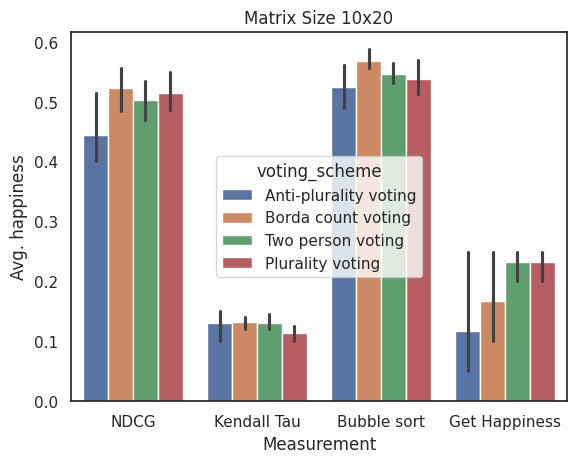

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='happiness_measure', y='happiness_values_avg', hue='voting_scheme', data=df_happiness).set(
    title=f'Matrix Size {candidates}x{voters}',
    xlabel='Measurement',
    ylabel='Avg. happiness'
    )

<h3> Boxplot </h3>
Voter specific values

In [36]:
# Explode df on hapiness values
df_happiness = df_happiness.explode("happiness_values")

[Text(0.5, 1.0, 'Matrix Size 10x20'),
 Text(0.5, 0, 'Measurement'),
 Text(0, 0.5, 'Voters Happiness')]

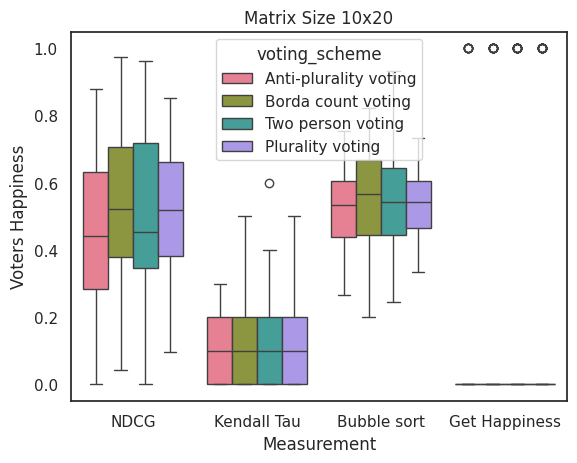

In [37]:
# create 3rd grouped boxplot 
sns.boxplot(x = df_happiness['happiness_measure'], 
			y = df_happiness['happiness_values'], 
			hue = df_happiness['voting_scheme'], 
			palette = 'husl').set(
    title=f'Matrix Size {candidates}x{voters}',
    xlabel='Measurement',
    ylabel='Voters Happiness'
    )

# Risk

[Text(0.5, 1.0, 'Matrix Size 10x20'),
 Text(0.5, 0, 'Measurement'),
 Text(0, 0.5, 'Risk of voting manipulation')]

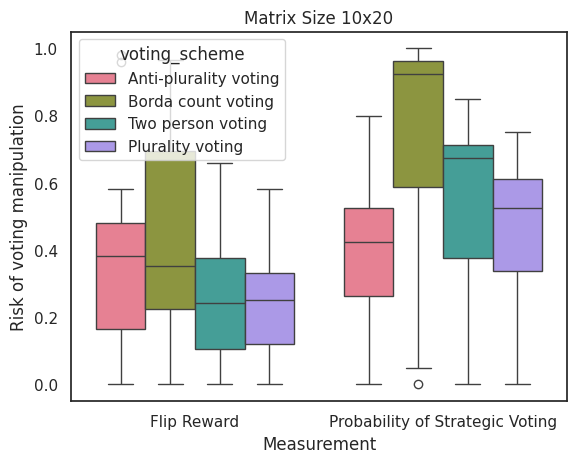

In [38]:
# create 3rd grouped boxplot 
sns.boxplot(x = df['risk_measure'], 
			y = df['risk_values'], 
			hue = df['voting_scheme'], 
			palette = 'husl').set(
    title=f'Matrix Size {candidates}x{voters}',
    xlabel='Measurement',
    ylabel='Risk of voting manipulation'
    )